In [1]:
import pandas as pd

bc_df = pd.read_csv('https://raw.githubusercontent.com/lynn0032/MLCamp2021/main/breast_cancer.csv')

bc_df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


<Figure size 432x288 with 0 Axes>

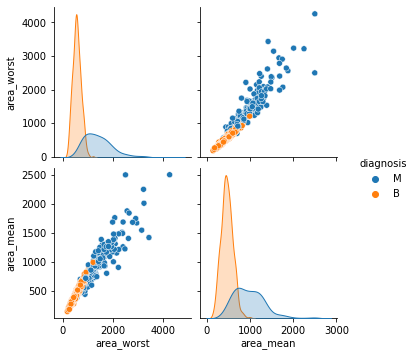

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
sns.pairplot(bc_df[["area_worst", "area_mean", 'diagnosis']], vars=["area_worst", "area_mean"], hue = "diagnosis")
plt.show()

In [3]:
features = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

measurements = bc_df.loc[:, features].values

In [4]:
from sklearn.preprocessing import StandardScaler

measurements_normalized = StandardScaler().fit_transform(measurements)

In [5]:
from sklearn.decomposition import PCA

num_components = 2

pca = PCA(n_components=num_components)

pca_breast_cancer = pca.fit_transform(measurements_normalized)

pca_features = ['pc' + str(n) for n in range(1, num_components+1)]

pca_df = pd.DataFrame(data = pca_breast_cancer, columns = pca_features)
pca_df['diagnosis'] = bc_df['diagnosis']
pca_df.describe(include='all')

,pc1,pc2,diagnosis
count,5.690000e+02,5.690000e+02,569
unique,NaN,NaN,2
top,NaN,NaN,B
freq,NaN,NaN,357
mean,1.873136e-16,2.206788e-16,NaN
std,3.647601e+00,2.387755e+00,NaN
min,-5.565736e+00,-7.775853e+00,NaN
25%,-2.757430e+00,-1.499825e+00,NaN
50%,-1.173831e+00,-1.959558e-01,NaN
75%,2.508766e+00,1.228297e+00,NaN


<Figure size 432x288 with 0 Axes>

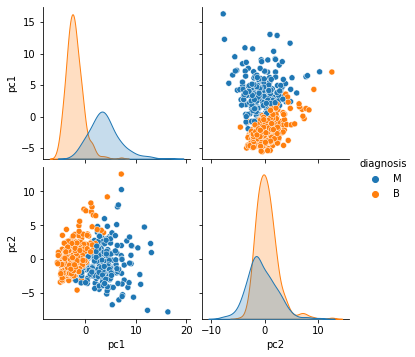

In [6]:
plt.figure()
sns.pairplot(pca_df, vars=pca_features, hue = "diagnosis")
plt.show()

In [7]:
from google.colab import files
pca_df.to_csv('bc_data.csv') 
files.download('bc_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>